# Challenge

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017. The following information is available for each flight:

* Fecha-I: Scheduled date and time of the flight.
* Vlo-I : Scheduled flight number.
* Ori-I : Programmed origin city code.
* Des-I : Programmed destination city code.
* Emp-I : Scheduled flight airline code.
* Fecha-O : Date and time of flight operation.
* Vlo-O : Flight operation number of the flight.
* Ori-O : Operation origin city code
* Des-O : Operation destination city code.
* Emp-O : Airline code of the operated flight.
* DIA: Day of the month of flight operation.
* MES : Number of the month of operation of the flight.
* AÑO : Year of flight operation.
* DIANOM : Day of the week of flight operation.
* TIPOVUELO : Type of flight, I =International, N =National.
* OPERA : Name of the airline that operates.
* SIGLAORI: Name city of origin.
* SIGLADES: Destination city name.

## Question #1

How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, time
from datetime import timedelta

# Load data
df = pd.read_csv('dataset_SCL.csv')

### Visualizations of destinations and airlines

<AxesSubplot:xlabel='SIGLADES', ylabel='count'>

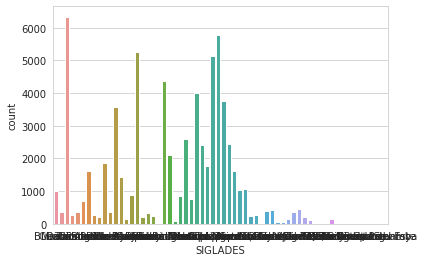

In [93]:
sns.countplot(data=df, x='SIGLADES')

There are destinations which are far more common among the database than others

In [94]:
df.groupby(['SIGLADES']).count()[['Fecha-I']].sort_values(by='Fecha-I', ascending=False).head(20).reset_index()

,SIGLADES,Fecha-I
0,Buenos Aires,6335
1,Antofagasta,5786
2,Lima,5270
3,Calama,5146
4,Puerto Montt,4357
5,Concepcion,3993
6,Iquique,3747
7,Sao Paulo,3569
8,Temuco,2589
9,Arica,2436


* We observe that the most common destinations are either to the neighbor countries or within national terrain
* Buenos Aires, Sao Paulo & Panama City appear within the most common destinations, arguably because they are often used for internationa scales


<AxesSubplot:xlabel='OPERA', ylabel='count'>

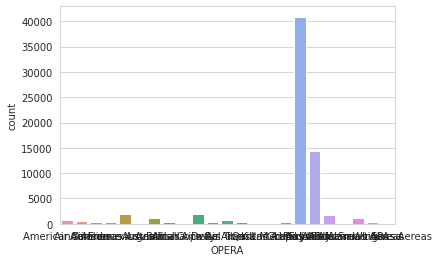

In [95]:
sns.countplot(data=df, x='OPERA')

We observe 2 highly frequent airlines in our dataframe

In [96]:
df.groupby(['OPERA']).count()[['Fecha-I']].sort_values(by='Fecha-I', ascending=False).head(20).reset_index()

,OPERA,Fecha-I
0,Grupo LATAM,40892
1,Sky Airline,14298
2,Aerolineas Argentinas,1949
3,Copa Air,1850
4,Latin American Wings,1674
5,Avianca,1152
6,JetSmart SPA,1095
7,Gol Trans,806
8,American Airlines,757
9,Air Canada,565


These correspond to LATAM and SKY

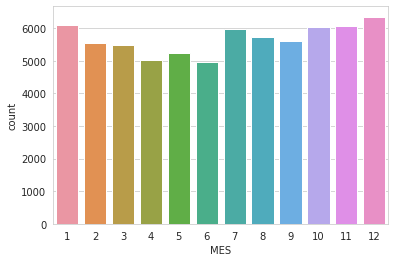

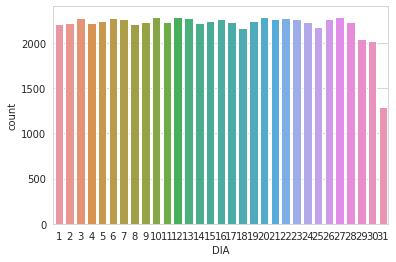

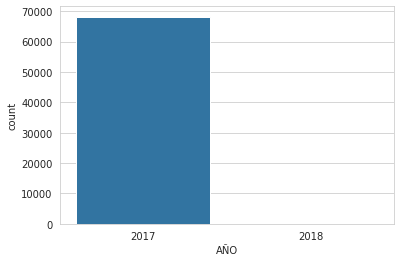

In [97]:
sns.countplot(data=df, x='MES')
plt.show()
sns.countplot(data=df, x='DIA')
plt.show()
sns.countplot(data=df, x='AÑO')
plt.show()


In [98]:
df[df.AÑO==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


We can asume data is evenly distributed along the year 2017. Almost all the data its from year 2017, with the exception of two flights, corresponding to flights that where programmed for the last minutes of 2017, but were delayed into 2018

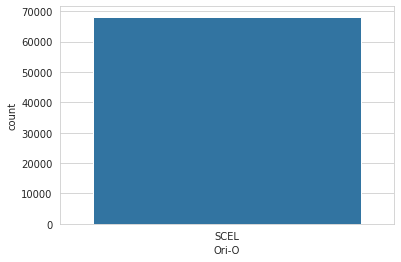

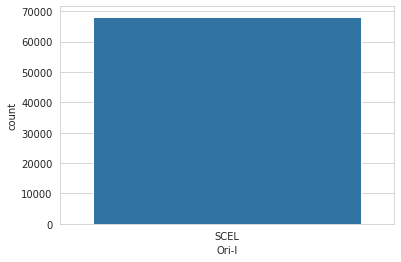

In [99]:
sns.countplot(data=df, x='Ori-O')
plt.show()
sns.countplot(data=df, x='Ori-I')
plt.show()

All flights within the database departure from the city of Santiago de Chile

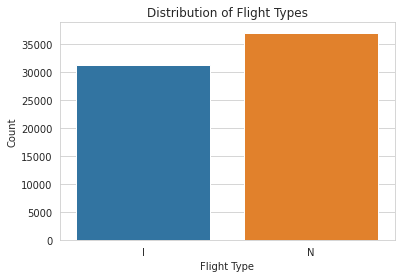

In [100]:
# Plot the distribution of flight types
sns.countplot(x='TIPOVUELO', data=df)
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

The majority of the flights are national

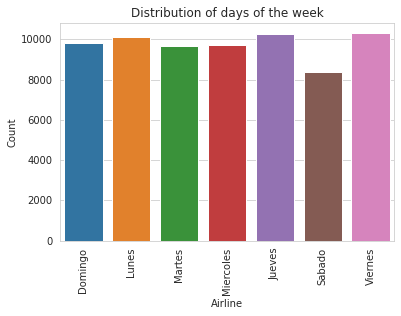

In [101]:

# Plot the distribution of flights by airline
sns.countplot(x='DIANOM', data=df)
plt.title('Distribution of days of the week')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [102]:
print(df.isna().sum())
# There is a NA in Vlo-O
df = df[df['Vlo-O'].notna()]

# 1. How is the data distributed?
# Show summary statistics for relevant columns
print(df[['Fecha-I', 'Fecha-O']].describe())


# Count number of unique values for categorical columns
for col in ['Ori-I', 'Des-I', 'Emp-I', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']:
    print(col + ':', df[col].nunique())

# Count number of flights by month and type of flight
print(df.groupby(['MES', 'TIPOVUELO'])['Vlo-I'].count())

# General description
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64
                    Fecha-I              Fecha-O
count                 68205                68205
unique                53252                62774
top     2017-03-19 18:00:00  2017-11-05 14:51:00
freq                      6                    5
Ori-I: 1
Des-I: 64
Emp-I: 30
Ori-O: 1
Des-O: 63
Emp-O: 32
DIANOM: 7
TIPOVUELO: 2
OPERA: 23
SIGLAORI: 1
SIGLADES: 62
MES  TIPOVUELO
1    I            2804
     N            3303
2    I            2499
     N            3062
3    I            2496
     N            2986
4    I            2354
     N            2666
5    I            2428
     N            2812
6    I            2373
     N            2608
7    I            2865
     N            3127
8    I            2

In [103]:
#pd.set_option('display.max_columns', None)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


To wrap up, in total, there are 64 destinations, 2 types of flight, 23 different airlines. There are times when flights arrive earlier than expected, its something important to note.

## Question #2

Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:

* high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
* min_diff : difference in minutes between Date-O and Date-I .
* delay_15 : 1 if min_diff > 15, 0 if not.
* period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), basedonDate-I .

In [104]:
# 2. Generate additional columns
# Create min_diff column
def get_min_diff(row):
    fecha_i = datetime.strptime(row['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    fecha_o = datetime.strptime(row['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    if fecha_o < fecha_i:
        fecha_o += timedelta(days=1)
        diff =  fecha_i - fecha_o
        min_diff = -diff.seconds//60
    else: 
        fecha_o += timedelta(days=1)
        diff =  fecha_o - fecha_i
        min_diff = diff.seconds//60
    return min_diff

df['min_diff'] = df.apply(lambda row: get_min_diff(row), axis=1)

# Create delay_15 column
df['delay_15'] = (df['min_diff'] > 15).astype(int) 
# Convert Fecha-I and Fecha-O to datetime format
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

# Create high_season colunum_classesnum_classesnum_classesnum_classesmn
df['high_season'] = ((df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 15)) | \
                    ((df['Fecha-I'].dt.month == 1) | (df['Fecha-I'].dt.month == 2) | (df['Fecha-I'].dt.month == 3)) | \
                    ((df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.day <= 31)) | \
                    ((df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) & (df['Fecha-I'].dt.day <= 30))
df['high_season'] = df['high_season'].astype(int)


# Create period_day column
morning = range(5, 12)
afternoon = range(12, 19)
night = list(range(0, 5)) + list(range(19, 24))
df['period_day'] = df['Fecha-I'].apply(lambda x: 'morning' if x.time().hour in morning else \
                                                        ('afternoon' if x.time().hour in afternoon else 'night'))

# Export to CSV
df[['high_season', 'min_diff', 'delay_15', 'period_day']].to_csv('synthetic_features.csv', index=False)


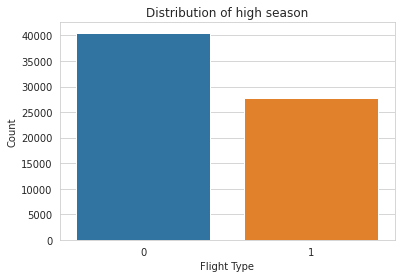

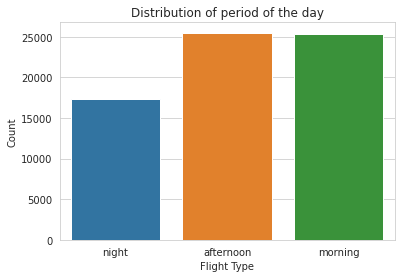

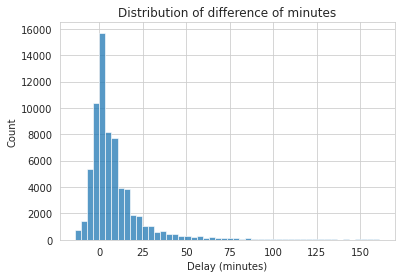

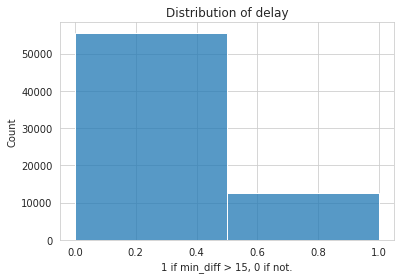

In [105]:
## Visual exploratory analysis of the new variables

# Plot the distribution of high season
sns.countplot(x='high_season', data=df)
plt.title('Distribution of high season')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of period of the day
sns.countplot(x='period_day', data=df)
plt.title('Distribution of period of the day')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()


# Plot the distribution of delays
sns.histplot(x='min_diff', data=df, bins=50)
plt.title('Distribution of difference of minutes')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of the target variable
sns.histplot(data=df, x='delay_15', bins=2)
plt.title('Distribution of delay')
plt.xlabel('1 if min_diff > 15, 0 if not.')
plt.ylabel('Count')
plt.show()

The target variable delay_15 is imbalanced

## Question #3

What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

In [41]:
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
display(dest_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
display(airline_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
display(month_delay.sort_values(['MES'], ascending=[True]))

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
display(dayofweek.sort_values([('delay_15', 'count')], ascending=[False]))

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
display(season_delay.sort_values([('delay_15', 'count')], ascending=[False]))

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': ['mean', 'count'], 'min_diff': 'mean'})
display(flighttype_delay.sort_values([('delay_15', 'count')], ascending=[False]))

delay_15          min_diff
           mean count        mean
Des-I                            
SCFA   0.146363  5787    7.023155
SPJC   0.230404  5269   11.737901
SCCF   0.122255  5145    5.970262
SCTE   0.168465  4357    8.868028
SCIE   0.156446  3995    8.392240
...         ...   ...         ...
SARI   0.000000     1   -2.000000
SBFI   0.000000     1    5.000000
SLCB   1.000000     1  113.000000
SEQM   1.000000     1   24.000000
SEQU   1.000000     1   80.000000

[64 rows x 3 columns]

delay_15          min_diff
                              mean  count       mean
OPERA                                               
Grupo LATAM               0.178666  40892   9.470630
Sky Airline               0.177647  14298   8.117149
Aerolineas Argentinas     0.240123   1949  10.004618
Copa Air                  0.062703   1850   0.214054
Latin American Wings      0.407053   1673  24.579199
Avianca                   0.265625   1152  11.131944
JetSmart SPA              0.178995   1095   7.442009
Gol Trans                 0.356079    806  11.911911
American Airlines         0.067371    757   0.277411
Air Canada                0.456637    565  22.909735
Iberia                    0.099448    362   4.276243
Delta Air                 0.058659    358   0.114525
Air France                0.083799    358   1.399441
Aeromexico                0.028490    351  -2.495726
United Airlines           0.050746    335  -1.856716
Oceanair Linhas Aereas    0.154122    279   6.340502
Alitalia                  0.111969    259   5.293436
K.L.M.                    0.083665    251   1.310757
British Airways           0.141463    205   7.560976
Qantas Airways            0.579487    195  26.835897
Lacsa                     0.119565     92   4.880435
Austral                   0.202703     74   6.608108
Plus Ultra Lineas Aereas  0.612245     49  31.714286

delay_15         min_diff
         mean count       mean
MES                           
1    0.160144  6107   7.770427
2    0.151591  5561   7.537853
3    0.115104  5482   5.757205
4    0.116534  5020   5.773506
5    0.157824  5240   7.521756
6    0.171050  4981   8.542461
7    0.293391  5992  15.372163
8    0.173398  5744   8.616818
9    0.172371  5610   8.497326
10   0.225962  6032  11.295922
11   0.197204  6080   9.342763
12   0.254091  6356  11.849591

delay_15          min_diff
               mean  count       mean
DIANOM                               
Viernes    0.222017  10292  10.891469
Jueves     0.199512  10250   9.521756
Lunes      0.202152  10131   9.980653
Domingo    0.161086   9796   7.930788
Miercoles  0.170850   9722   8.540835
Martes     0.169116   9662   8.324777
Sabado     0.163194   8352   8.315014

delay_15         min_diff
                 mean  count      mean
high_season                           
0            0.187465  40541  9.222639
1            0.181246  27664  8.947260

delay_15          min_diff
               mean  count       mean
TIPOVUELO                            
N          0.150571  36966   7.819510
I          0.225615  31239  10.639137

In [42]:
# without min_diff and count
# Destination delay
dest_delay = df.groupby('Des-I').agg({'delay_15': 'mean'})

# Airline delay
airline_delay = df.groupby('OPERA').agg({'delay_15': 'mean'})

# Month delay
month_delay = df.groupby('MES').agg({'delay_15': 'mean'})

# Day of the week delay
dayofweek = df.groupby('DIANOM').agg({'delay_15': 'mean'})

# Season Delay
season_delay = df.groupby('high_season').agg({'delay_15': 'mean'})

# Type of flight delay
flighttype_delay = df.groupby('TIPOVUELO').agg({'delay_15': 'mean'})


<bound method Axes.set_title of <AxesSubplot:xlabel='TIPOVUELO'>>

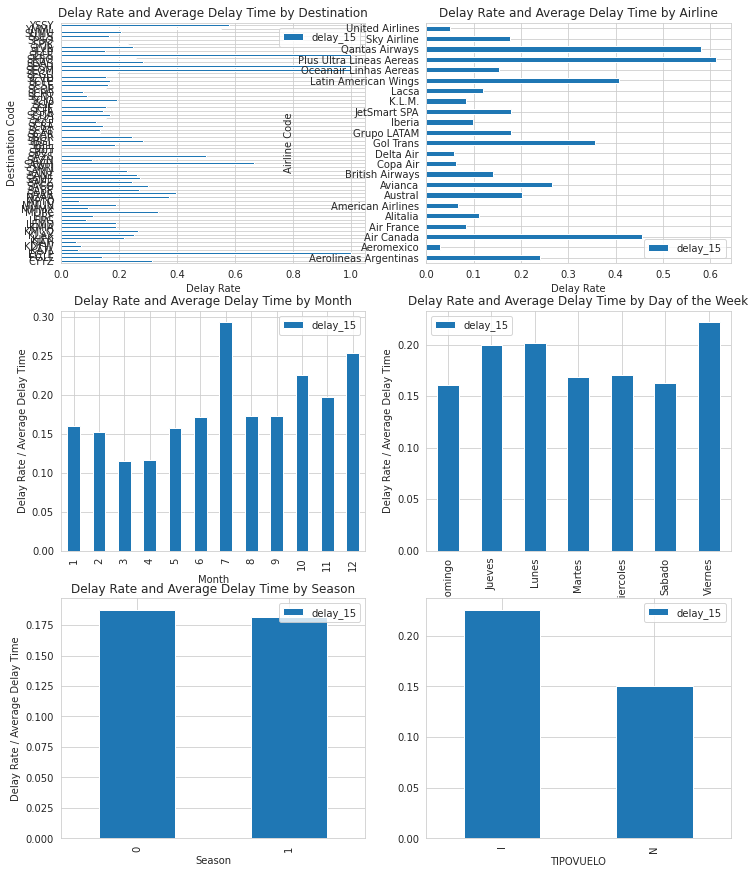

In [43]:
# Plot the delay rate and average delay time by destination, airline, month, day of the week, season, and type of flight
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

dest_delay.plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('Delay Rate and Average Delay Time by Destination')
axes[0, 0].set_xlabel('Delay Rate')
axes[0, 0].set_ylabel('Destination Code')

airline_delay.plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('Delay Rate and Average Delay Time by Airline')
axes[0, 1].set_xlabel('Delay Rate')
axes[0, 1].set_ylabel('Airline Code')

month_delay.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Delay Rate and Average Delay Time by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Delay Rate / Average Delay Time')

dayofweek.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Delay Rate and Average Delay Time by Day of the Week')
axes[1, 1].set_xlabel('Day of the Week')
axes[1, 1].set_ylabel('Delay Rate / Average Delay Time')

season_delay.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Delay Rate and Average Delay Time by Season')
axes[2, 0].set_xlabel('Season')
axes[2, 0].set_ylabel('Delay Rate / Average Delay Time')

flighttype_delay.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title

Based on the exploratory analysis, we can observe the following behavior of delay rate across different variables:

* Destination: Flights departing to some specific destinations have a higher likelihood of getting delayed. 

* Airline: Different airlines have different delay rates. For example, the top 3 airlines with more likelihood to be delayed are Plus Ultra Lineas Aereas, Qantas Airways and Air Canada.

* Month of the year: The delay rate is relatively higher in some specific months, with the top 3 being July, October and December.

* Day of the week: The delay rate is relatively higher on some specific days such as Fridays, and lower on Saturday and Sunday.

* Season: The delay rate is almost the same on both cases.

* Type of flight: International flights have a relatively higher delay rate as compared to national flights.

Taking al these observations into account, we expect that all of the variables above, with the exception of Season, will have high impact on the model

## Question #4

Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.

We create a new variable that categorizes destinations as we saw in question number 3 you have different means for each destination

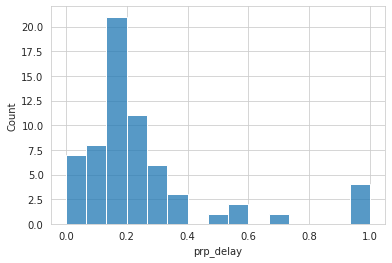

,Des-I,delay_15,count_des_i,prp_delay
0,EGYP,1,1,1.000000
61,SARI,0,1,0.000000
62,SPSO,0,1,0.000000
63,SBFI,0,1,0.000000
1,SLCB,1,1,1.000000
3,SEQM,1,1,1.000000
2,SEQU,1,1,1.000000
7,SAZS,1,2,0.500000
60,SBCT,0,3,0.000000
4,SAWH,4,6,0.666667


In [106]:
# New variable check in
tmp = df.groupby(['Des-I']).agg({'delay_15':'sum','Fecha-I':'count'}).rename(columns={'Fecha-I':'count_des_i'})
tmp['prp_delay'] = tmp.delay_15/tmp.count_des_i
tmp = tmp.sort_values(by='prp_delay', ascending=False).reset_index()

import seaborn as sns
sns.histplot(tmp.prp_delay)
plt.show()
display(tmp.sort_values(by='count_des_i',ascending=True).head(20))

We review the distribution of values for prp_delay (proportion of flights with delay for each Des-I) and replace outliers (these would be the Des-I where there's 10 or less observations) with the average value of prp_delay from the rest of the data. This is because we don't want to assume a high delay rate for destinations that only appear once (or just few appearances) in the dataframe (1 appearance, 1 delay = 100% delay rate)

68205


<AxesSubplot:xlabel='prp_delay', ylabel='Count'>

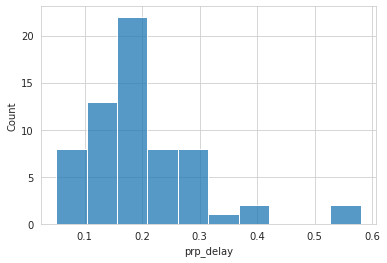

In [107]:
# creation of new function with 10 quantiles
mean_to_replace = tmp[tmp.count_des_i>10].prp_delay.mean()
tmp.loc[tmp.count_des_i<=10,'prp_delay'] = mean_to_replace
#display(tmp)
#print(tmp.count_des_i.sum())
print(len(df))
sns.histplot(tmp.prp_delay, bins=10)

We see that with this we only replace prp_delay of 7 destinations out of 63, which is equivalent to 245 replaced values

In [108]:
# check of prp_delay
tmp[tmp['Des-I']=='KMIA']

,Des-I,delay_15,count_des_i,prp_delay
33,KMIA,193,1015,0.190148


Next, we do the same for Emp-I and Emp-O, replacing values for counts equal or less than 10

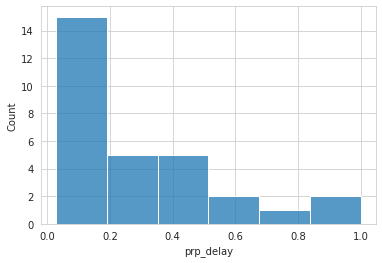

,Emp-I,delay_15,count_emp_i,prp_delay
0,LNE,1,1,1.000000
1,DSM,2,2,1.000000
5,LPE,2,4,0.500000
2,LXP,7,9,0.777778
3,PUE,30,49,0.612245
14,AUT,15,74,0.202703
20,LRC,11,92,0.119565
8,JMR,39,100,0.390000
4,QFU,113,195,0.579487
19,BAW,29,205,0.141463


In [109]:
# New variable check in
tmp = df.groupby(['Emp-I']).agg({'delay_15':'sum','Fecha-I':'count'}).rename(columns={'Fecha-I':'count_emp_i'})
tmp['prp_delay'] = tmp.delay_15/tmp.count_emp_i
tmp = tmp.sort_values(by='prp_delay', ascending=False).reset_index()

import seaborn as sns
sns.histplot(tmp.prp_delay)
plt.show()
display(tmp.sort_values(by='count_emp_i',ascending=True).head(20))

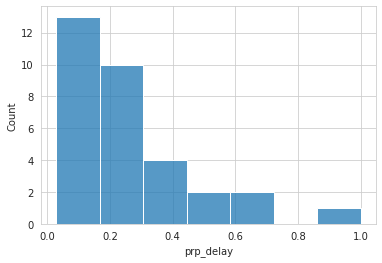

,Emp-O,delay_15,count_emp_o,prp_delay
0,TPU,2,2,1.000000
14,48O,2,10,0.200000
1,56R,11,16,0.687500
2,PUE,30,49,0.612245
13,AUT,17,77,0.220779
3,QFA,113,195,0.579487
21,BAW,29,205,0.141463
9,LAP,62,219,0.283105
26,KLM,21,251,0.083665
22,AZA,29,259,0.111969


In [110]:
# New variable check in
tmp = df.groupby(['Emp-O']).agg({'delay_15':'sum','Fecha-I':'count'}).rename(columns={'Fecha-I':'count_emp_o'})
tmp['prp_delay'] = tmp.delay_15/tmp.count_emp_o
tmp = tmp.sort_values(by='prp_delay', ascending=False).reset_index()

import seaborn as sns
sns.histplot(tmp.prp_delay)
plt.show()
display(tmp.sort_values(by='count_emp_o',ascending=True).head(20))

We can see that Emp-I and Emp-O have similar distributions for the created variable, and this is because Emp-i corresponds to the scheduled airline that will operate the flight (which value is registered before the flight), and Emp-O corresponds to the actual airline that operated the flight (which is registered ex post). Since we want to predict the delay future flights, in practice, we would only have information for Emp-I, hence, we only keep that variable from the two.

In [115]:
# We define a function to calculate delay rates for each categorical variable: Des-I and Emp-I
def get_delay_rates(df, col, n_classes, var_name):
    tmp = df.groupby([col]).agg({'delay_15':'sum','Fecha-I':'count'}).rename(columns={'Fecha-I':'count_'})
    tmp[f'delay_rate_{var_name}'] = tmp.delay_15/tmp.count_
    tmp = tmp.sort_values(by=f'delay_rate_{var_name}', ascending=False).reset_index()
    mean_to_replace = tmp[tmp.count_>10][f'delay_rate_{var_name}'].mean()
    tmp.loc[tmp.count_<=10,f'delay_rate_{var_name}'] = mean_to_replace
    df = df.merge(tmp[[col]+[f'delay_rate_{var_name}']], on=[col], how='left')
    return df

df = get_delay_rates(df, 'Des-I', 10, 'destination')
df = get_delay_rates(df, 'Emp-I', 10, 'airline_code')

df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,min_diff,delay_15,high_season,period_day,prp_delay_dest,prp_delay_air_code,delay_rate_dest,delay_rate_air_code,delay_rate_destination,delay_rate_airline_code
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,3,0,1,night,0.190148,0.067371,0.190148,0.067371,0.190148,0.067371
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,9,0,1,night,0.190148,0.067371,0.190148,0.067371,0.190148,0.067371
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,9,0,1,night,0.190148,0.067371,0.190148,0.067371,0.190148,0.067371
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,3,0,1,night,0.190148,0.067371,0.190148,0.067371,0.190148,0.067371
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,-2,0,1,night,0.190148,0.067371,0.190148,0.067371,0.190148,0.067371


Now we model with our new variables

In [118]:
df.drop(['Fecha-I', 'Fecha-O', 'Vlo-I', 'Vlo-O', 'DIA', 'Ori-I', 'Ori-O', 'Emp-I', 'Emp-O', 'SIGLAORI','SIGLADES', 'Des-I', 'Des-O', 'AÑO', 'min_diff'], axis=1).columns

Index(['MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'delay_15', 'high_season',
       'period_day', 'delay_rate_destination', 'delay_rate_airline_code'],
      dtype='object')

In [119]:
# Import libraries
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


# Select features and target variable
df = df[['MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'delay_15', 'high_season',
       'period_day', 'delay_rate_destination', 'delay_rate_airline_code']]

# Create dummies from categorical variables
df['MES'] = df['MES'].astype(str)
string_columns = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=string_columns)

# Split the dataset into X (features) and y (target variable)
X = df.drop(['delay_15'], axis=1)
y = df['delay_15']
df = df.loc[:,~df.columns.duplicated()].copy()

# Balance the target variable using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X.values, y.ravel())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
# Define logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_params = {
    'C': [0.01, 0.1, 1, 10]
}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='precision')
lr_grid.fit(X_train, y_train)

# Define random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='precision')
rf_grid.fit(X_train, y_train)

# Define XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_params = {
   'n_estimators': [100, 500, 1000],
   'max_depth': [3, 5, 7],
   'learning_rate': [0.01, 0.1, 0.5]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='precision')
xgb_grid.fit(X_train, y_train)

# Make predictions on test set
lr_preds = lr_grid.predict(X_test)
rf_preds = rf_grid.predict(X_test)
xgb_preds = xgb_grid.predict(X_test)


# Save the models to pickle files
import pickle

with open('lr.pkl', 'wb') as f:
    pickle.dump(lr_grid, f)

with open('rf.pkl', 'wb') as f:
    pickle.dump(rf_grid, f)
    
with open('xgb.pkl', 'wb') as f:
    pickle.dump(xgb_grid, f)

We are interested in minimizing the number of false positives, because the cost of adapting the operation due to a false delay is high, since it could have implications such as rescheduling flights, logistical problems with airports, etc.

Given the above, the precision metric should be used to perform hyperparameter optimization, since by maximizing this metric, we minimize the number of false positives, achieving savings in operational costs.

$Precision = \frac{True\ Positives}{True\ Positives + False\ Positives}$

## Question # 5

Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used
to assess model performance. Pick the best trained model and evaluate the following: What variables were the most influential in
the prediction task? How could you improve the
Performance?

In [126]:
import pickle

# Load trained models
with open('lr.pkl', 'rb') as f:
    lr_grid = pickle.load(f)    

with open('rf.pkl', 'rb') as f:
    rf_grid = pickle.load(f)    
    
with open('xgb.pkl', 'rb') as f:
    xgb_grid = pickle.load(f)
    

# Make predictions on test set
lr_preds = lr_grid.predict(X_test)
rf_preds = rf_grid.predict(X_test)
xgb_preds = xgb_grid.predict(X_test)

# Evaluate model performance
lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
lr_roc = roc_auc_score(y_test, lr_preds)

rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_roc = roc_auc_score(y_test, rf_preds)

xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_prec = precision_score(y_test, xgb_preds)
xgb_rec = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)
xgb_roc = roc_auc_score(y_test, xgb_preds)

# Logistic regression performance
print("Logistic Regression Model:")
print(f"Accuracy: {lr_acc}")
print(f"Precision: {lr_prec}")
print(f"Recall: {lr_rec}")
print(f"F1-score: {lr_f1}")
print(f"ROC: {lr_roc}")

# Random Forest performance
print("\nRandom Forest Model:")
print(f"Accuracy: {rf_acc}")
print(f"Precision: {rf_prec}")
print(f"Recall: {rf_rec}")
print(f"F1-score: {rf_f1}")
print(f"ROC: {rf_roc}")

# XGBoost performance
print("\nXGBoost Model:")
print(f"Accuracy: {xgb_acc}")
print(f"Precision: {xgb_prec}")
print(f"Recall: {xgb_rec}")
print(f"F1-score: {xgb_f1}")
print(f"ROC: {xgb_roc}")


Logistic Regression Model:
Accuracy: 0.6271529432927103
Precision: 0.6272828922847559
Recall: 0.6107230336568992
F1-score: 0.6188922086876579
ROC: 0.627013023873215

Random Forest Model:
Accuracy: 0.8002428385123893
Precision: 0.8215577054627187
Recall: 0.7626780368320784
F1-score: 0.7910237109522017
ROC: 0.7999229313819747

XGBoost Model:
Accuracy: 0.817016683905203
Precision: 0.9042083236456638
Recall: 0.7056155311621156
F1-score: 0.7926624203821656
ROC: 0.8160679760322794


### ROC Curve

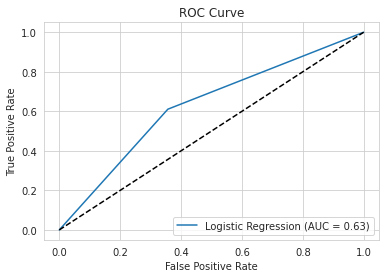

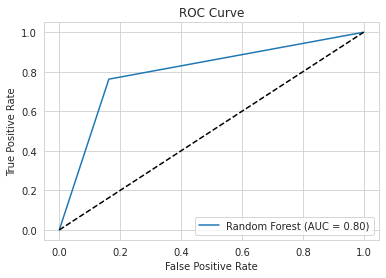

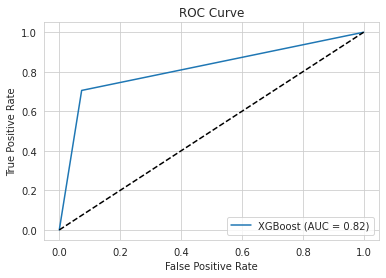

In [127]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 


# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_preds)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, lr_preds)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_preds)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, rf_preds)

# Plot the ROC curve
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_preds)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, xgb_preds)

# Plot the ROC curve
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The best trained model its the XGBoost model and we can see that in the accuracy, precision and area under the curve(ROC), as we said earlier, precision will be our prefered metric and in this model we have the highest among the three.

### Lift and cumulative gain

* Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.
* Cumulative gains and lift charts are visual aids for measuring model performance
* Both charts consist of a lift curve and a baseline
* A lift curve shows the same information as an ROC curve, but in a way to dramatize the richness of the ordering at the beginning.

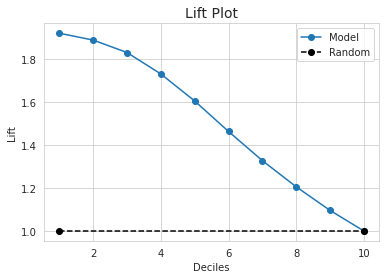

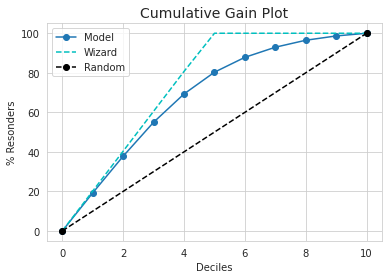

In [128]:
import kds

y_prob = rf_grid.predict_proba(X_test)
kds.metrics.plot_lift(y_test, y_prob[:,1])
plt.show()
kds.metrics.plot_cumulative_gain(y_test, y_prob[:,1])
plt.show()

### Feature importances for the selected model

,0,1
1,delay_rate_destination,0.0693264
21,DIANOM_Viernes,0.0606258
22,TIPOVUELO_I,0.0482283
12,MES_7,0.0475786
32,OPERA_British Airways,0.0448929
9,MES_4,0.0445697
6,MES_12,0.0350201
18,DIANOM_Martes,0.0343087
2,delay_rate_airline_code,0.0342588
0,high_season,0.0289186


<AxesSubplot:>

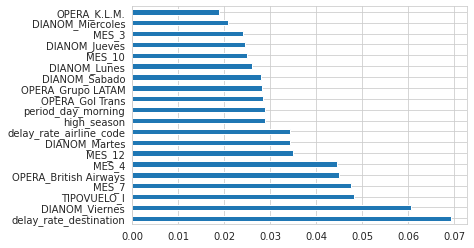

In [139]:
pd.set_option('max_row', None)
display(pd.DataFrame([X.columns,xgb_grid.best_estimator_.feature_importances_]).T.sort_values(by=1, ascending=False))
feat_importances = pd.Series(xgb_grid.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

The top three variables were the destination, day of the week, month, airline and type of flight

### How we could improve it? 

* Expand the search space of grid search or use more sophisticated methods of hyperparameter optimization. 
* Other ways of modeling could be evaluated, using mindiff and doing a regression instead of a classification 
* Use different models besides our three ones that we used and also uso ensemble methods. 
* More variables could be incorporated, such as the weather, number of passengers, whether it is a stopover or not, and more